In [552]:
import os
import pickle
import pprint
import matplotlib.pyplot as plt

data_path = "./agents/f1/logs/qlearn_models/qlearn_camera_solved/"
available_folders = ["1", "2", "3"]
circuits = ["simple_circuit", "nurburgring", "montreal"]

In [592]:
def read_pkl(file):
    # print(file)
    qlearn_file = open(file, 'rb')
    model = pickle.load(qlearn_file)
    
    return model

q_table = []
states_counter = []
states_cum_reward = []
states_steps = []

SHOW_PRINTS = False



circuits = ["simple_circuit", "nurburgring", "montreal"]
label_circuit = ["Circuito Simple", "Nürburgring", "Montreal"]
current_label_circuit = label_circuit[0]

action_group = ["simple", "medium", "hard"]

CIRCUIT = circuits[1]
CURRENT_ACTION = action_group[1]
POI = 2

folders = os.listdir(os.path.join(data_path, CIRCUIT))
if SHOW_PRINTS: print(f"Folders: {folders}")

current_group_expermiments_path = ""
for folder in folders:
    folder_action = folder.split("__")[-1]
    current_poi = folder.split("_")[0]
    
    if CURRENT_ACTION == folder_action and int(current_poi) == POI:
        if SHOW_PRINTS: print(f"FOLDER: {folder} - FOLDER ACTION: {folder_action} - CURRENT POI: {current_poi}")
        current_group_expermiments_path = os.path.join(data_path, CIRCUIT, folder)
        
if SHOW_PRINTS: print(f"Current group experiments: {sorted(os.listdir(current_group_expermiments_path))}")

for experiment_path in sorted(os.listdir(current_group_expermiments_path)):
    
    path_to_experiment = os.path.join(current_group_expermiments_path, experiment_path)
    if SHOW_PRINTS: print(f"experiment: {os.path.join(current_group_expermiments_path, experiment_path)}")
    
    files = sorted(os.listdir(path_to_experiment))
    if SHOW_PRINTS: print(f" Files in experiment path: {files}")
        
    if len(files) > 1:
        q_table.append(read_pkl(os.path.join(path_to_experiment, files[0])))
        states_counter.append(read_pkl(os.path.join(path_to_experiment, files[1])))
        states_cum_reward.append(read_pkl(os.path.join(path_to_experiment, files[2])))
        check_type = read_pkl(os.path.join(path_to_experiment, files[3]))
        if type(check_type) == dict:
            states_steps.append(check_type)

        if SHOW_PRINTS: print("readed")

print(f"READED --> CIRCUIT: {CIRCUIT} - ACTION SET: {CURRENT_ACTION} - POI: {POI}")

#print(len(states_counter[0]))
#print(states_cum_reward)
#print(states_steps)
print(q_table[0])

READED --> CIRCUIT: nurburgring - ACTION SET: medium - POI: 2
{('88', 0): -170.9630185926472, ('-68', 0): -109.18532449676893, ('22', 1): 88.76186822489741, ('00', 2): 70.61097788648807, ('-5-7', 1): -119.90935505202879, ('-78', 1): -158.79588596497112, ('-6-7', 4): 23.22042369066962, ('56', 4): 8.535215127032338, ('57', 4): -21.28230787879375, ('-7-7', 4): 1, ('67', 2): -100, ('-5-7', 2): -20.823504979582722, ('02', 3): 72.50134914636672, ('78', 1): -55.32126498964573, ('44', 3): 66.66272707443416, ('1-1', 4): 69.54540552680736, ('03', 2): 21.285961789925103, ('-4-4', 2): 36.0646608245369, ('55', 3): 1, ('-3-4', 1): 1, ('-2-1', 3): 49.038035337332886, ('37', 0): 32.276260596649, ('-4-7', 0): 31.464187994726988, ('56', 3): 55.99303919073067, ('66', 4): 27.85192795269092, ('0-2', 2): 75.72485199498774, ('67', 1): -41.743701146287385, ('-3-1', 4): 1, ('-6-6', 3): -119.12298049043801, ('45', 4): -1.7667748832541363, ('-6-7', 2): -128.54679585602722, ('68', 3): -29.582073238627665, ('77', 

# DATOS CARGADOS --> GRÁFICAS

/home/nachoaz/Pictures


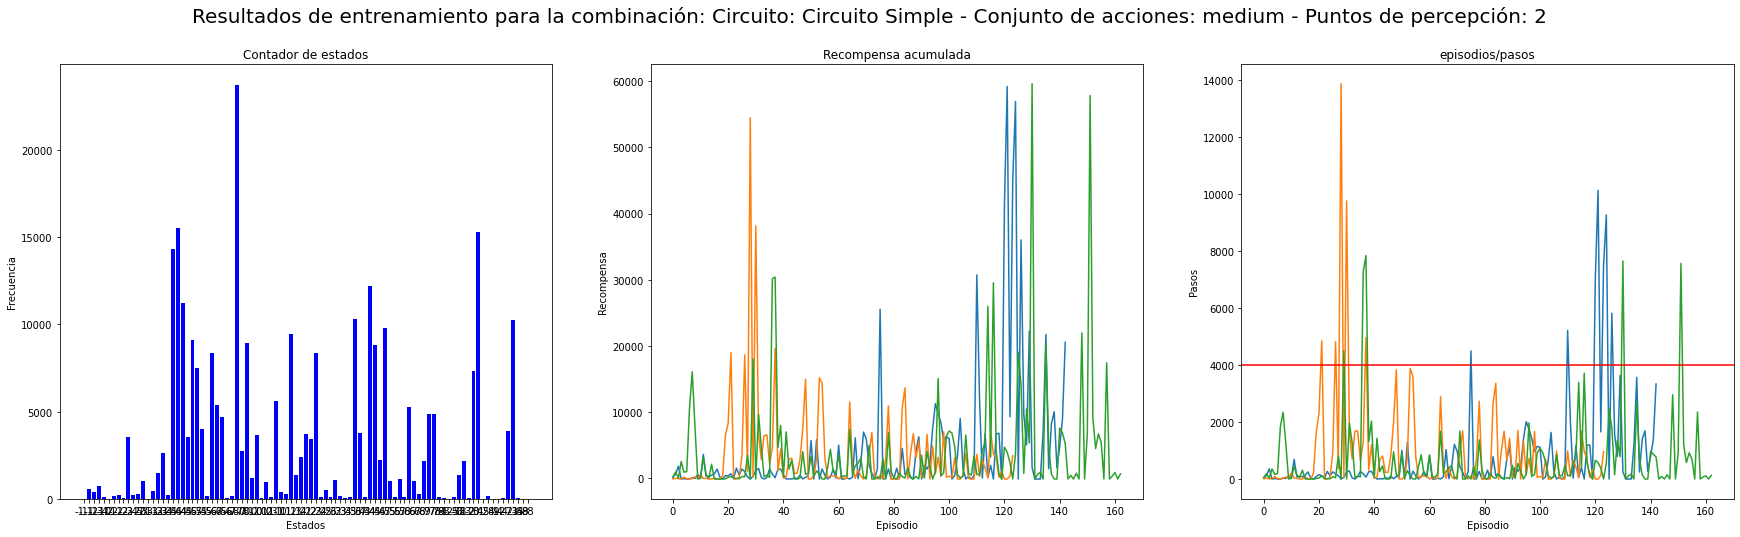

In [617]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, 3, figsize=(30, 8))
fig.suptitle(f"Resultados de entrenamiento para la combinación: Circuito: {current_label_circuit} - Conjunto de acciones: {CURRENT_ACTION} - Puntos de percepción: {POI}", fontsize=20)

for i in range(len(states_counter)):
    axs[0].bar(list(sorted(states_counter[i].keys())), list(states_counter[i].values()), color="blue")
for j in range(len(states_cum_reward)):
    axs[1].plot(list(states_cum_reward[j].keys()), list(states_cum_reward[j].values()))
for k in range(len(states_steps)):
    axs[2].plot(list(states_steps[k].keys()), list(states_steps[k].values()))


axs[0].set_title('Contador de estados')
#if POI > 1:
#axs[0].set_xticklabels(states_counter, rotation=45)

axs[1].set_title('Recompensa acumulada')
axs[2].set_title('episodios/pasos')

axs[2].axhline(y=4000, c='r')

# for ax in axs.flat:
axs[0].set(xlabel='Estados', ylabel='Frecuencia')
axs[1].set(xlabel='Episodio', ylabel='Recompensa')
axs[2].set(xlabel='Episodio', ylabel='Pasos')

SAVE = True
if SAVE:
    file_name = "training_metrics_actions_{}"
    print(os.path.join(os.path.expanduser('~'), "Pictures"))
    # plt.savefig(os.path.join(os.path.expanduser('~'), "Pictures") + str(CIRCUIT) + str(CURRENT_ACTION) + str(POI) + ".png")
    plt.savefig("/home/nachoaz/Pictures/" + str(CIRCUIT) + "_" + str(CURRENT_ACTION) + "_" + str(POI) + ".png")

91
{'-5-5': 16, '-5-4': 5, '-5-7': 935, '-5-6': 1781, '-7-7': 19, '-3-1': 5, '-3-2': 31, '-6-7': 371, '-6-5': 1, '-21': 3, '58': 1035, '68': 1845, '88': 448, '26': 8, '66': 18, '67': 786, '-1-1': 6415, '69': 2, '-1-3': 19769, '-1-2': 29597, '-1-4': 521, '-2-2': 929, '-2-3': 17723, '00': 20104, '-3-4': 6733, '-3-3': 205, '21': 1485, '22': 10224, '23': 12549, '-68': 77, '47': 9056, '44': 383, '45': 2865, '-4-4': 52, '-4-5': 2131, '-4-6': 9247, '-4-7': 77, '-6-6': 95, '46': 5375, '14': 418, '-11': 100, '02': 544, '0-1': 19230, '0-2': 5074, '-3-6': 4197, '1-1': 247, '43': 29, '-3-5': 23805, '-2-5': 2978, '77': 40, '-10': 1225, '01': 3996, '24': 4108, '79': 13, '78': 624, '11': 22766, '10': 5913, '13': 2340, '12': 11644, '-2-4': 33065, '33': 2766, '32': 138, '57': 5690, '56': 917, '37': 77, '36': 2292, '35': 5266, '34': 6172, '-2-1': 104, '55': 130, '-20': 13, '25': 364, '-78': 124, '03': 48, '54': 1, '0-3': 83, '-1-5': 1, '42': 1, '-2-6': 19, '1-2': 4, '20': 45, '-58': 1, '89': 3, '31': 8,

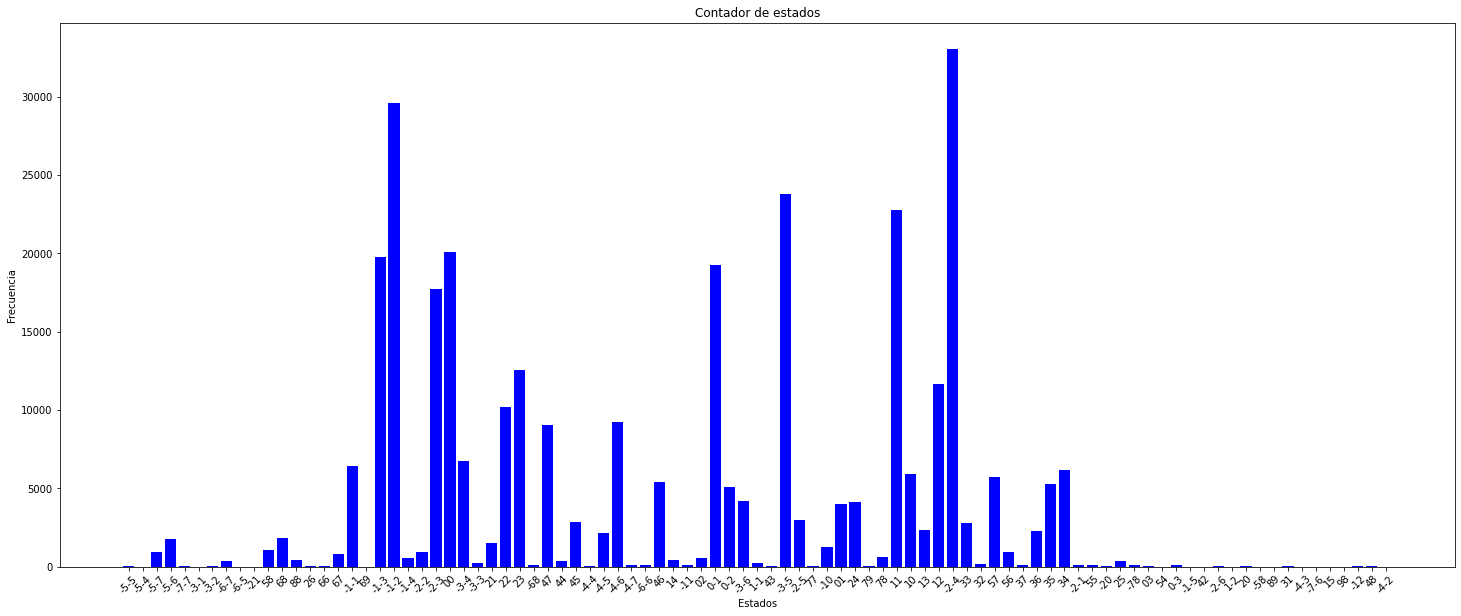

In [651]:
from collections import Counter

A = Counter(**states_counter[0])
B = Counter(**states_counter[1])
C = Counter(**states_counter[2])

megadict = dict(A + B + C)
print(len(megadict))
print(megadict)

max_value = max(megadict, key=megadict.get)
max_states_counter = megadict[max_value]

print(f"Best state: {max_state} - with value: {max_states_counter}")

fig, axs = plt.subplots(1, 1, figsize=(25, 10))
axs.set_title('Contador de estados')
axs.set(xlabel='Estados', ylabel='Frecuencia')
axs.bar(list(megadict.keys()), list(megadict.values()), color="blue")
axs.set_xticklabels(megadict, rotation=45)


plt.savefig("/home/nachoaz/Pictures/" + str(CIRCUIT) + "_" + str(CURRENT_ACTION) + "_" + str(POI) + ".png")

# Aquí se sacan los valores máximos o más frecuente

In [632]:
# states_counter
# max_states_cum_reward
# max_states_steps

max_states_counter = 0
max_state = ""
for dicc in states_counter:
    print(dicc, "\n")
    max_value = max(dicc, key=dicc.get)
    if int(dicc[max_value]) > int(max_states_counter):
        max_states_counter = dicc[max_value]
        max_state = max_value
    
print(f"Best state: {max_state} - with value: {max_states_counter}")

{'-5-5': 14, '-5-4': 2, '-5-7': 397, '-5-6': 747, '-7-7': 10, '-3-1': 1, '-3-2': 20, '-6-7': 195, '-6-5': 1, '-21': 1, '58': 10, '68': 277, '88': 96, '26': 1, '66': 2, '67': 116, '-1-1': 2625, '69': 1, '-1-3': 5242, '-1-2': 15528, '-1-4': 8, '-2-2': 459, '-2-3': 9134, '00': 7513, '-3-4': 4028, '-3-3': 146, '21': 1185, '22': 5381, '23': 2089, '-68': 42, '47': 121, '44': 224, '45': 259, '-4-4': 45, '-4-5': 1167, '-4-6': 3641, '-4-7': 23, '-6-6': 48, '46': 113, '14': 11, '-11': 2, '02': 42, '0-1': 9478, '0-2': 1347, '-3-6': 763, '1-1': 37, '43': 2, '-3-5': 8349, '-2-5': 110, '77': 5, '-10': 131, '01': 382, '24': 185, '79': 2, '78': 121, '11': 10330, '10': 3768, '13': 123, '12': 1760, '-2-4': 8802, '33': 1493, '32': 76, '57': 151, '56': 93, '37': 9, '36': 118, '35': 184, '34': 1043, '-2-1': 19, '55': 41, '-20': 2, '25': 44, '-78': 85, '03': 2} 

{'58': 4, '-5-7': 538, '56': 287, '-7-7': 6, '54': 1, '0-3': 82, '-6-7': 176, '-21': 1, '43': 27, '02': 2, '-1-1': 220, '88': 116, '-5-6': 1034, '

In [ ]:
sorted(model, key=model.get, reverse=True)

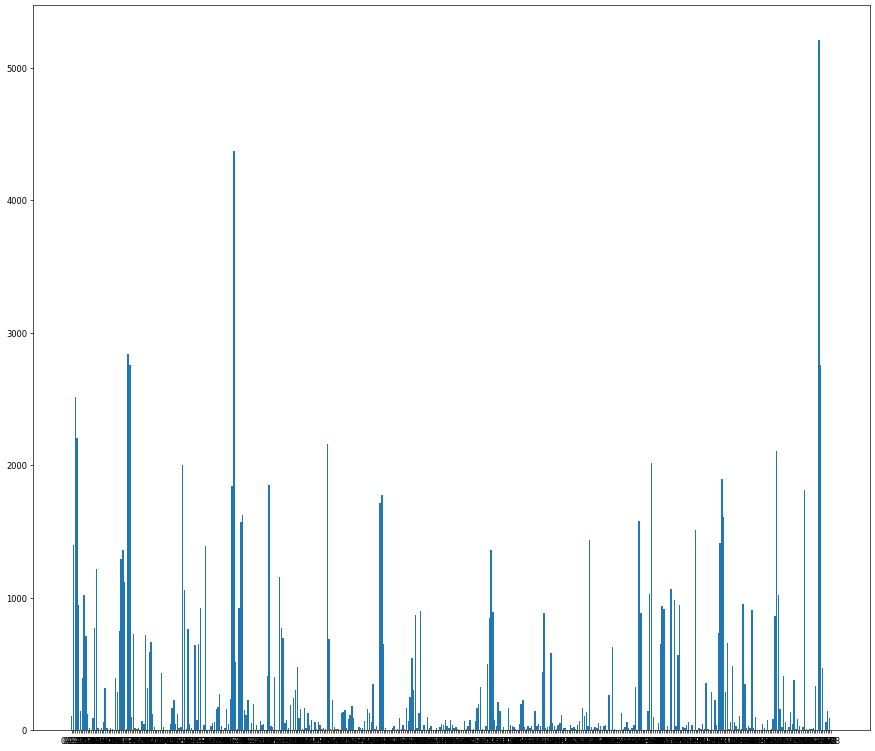

In [26]:
fig = plt.figure(figsize=(18, 16), dpi=60, facecolor='w', edgecolor='k')

plt.bar(range(len(model)), list(model.values()), align='center')
plt.xticks(range(len(model)), list(model.keys()))
plt.show()

## ODOMETRIA

In [558]:
import os
import pickle
import pprint
import numpy as np
import matplotlib.pyplot as plt

def read_pkl(file):
    # print(f"pkl readed ----> {file}")
    qlearn_file = open(file, 'rb')
    model = pickle.load(qlearn_file)
    
    return model

data_path = "./agents/f1/logs/qlearn_models/qlearn_camera_solved/"
available_folders= ["1", "2", "3"]


# CIRCUITO
circuits = ["simple_circuit", "nurburgring", "montreal"]
CIRCUIT = circuits[1]

# ACCION
action_group = ["simple", "medium", "hard"]
CURRENT_ACTION = action_group[1]

# POI
POI = "1"

experiments = ["", "1", "2", "3"]
experiment = experiments[3]

# folder_inference_path = os.path.join(data_path, CIRCUIT, POI + "_point__actions_set__" + CURRENT_ACTION, experiment)
inference_folder = "./agents/f1/logs/qlearn_models/qlearn_camera_solved/simple_circuit/1_point__actions_set__hard/3/"
inference_path = inference_folder + "5_NO_COMPLETED_1_point__actions_set__hard_3_tested_on_simple_circuit_time_0:00:01.362161.pkl"

# inference_file = sorted(os.listdir(os.path.join(folder_inference_path)))[-1]
# inference_path = os.path.join(folder_inference_path, inference_file)
print(f"Folder Inference Path: {folder_inference_path}")
print(f"Inference File:        {inference_file}")
print(f"Inference Path:        {inference_path}")

rl_coords = read_pkl(inference_path)

rl_points = np.array([list(pos[1]) for pos in rl_coords])
print(f"LEN ALGORITHM POINTS: {len(rl_points)}")

#####################
# MANUAL PILOT COORDS
#####################
manual_path = './agents/f1/logs/' + CIRCUIT + '_manual_checkpoints.pkl'
manual_coords = read_pkl(manual_path)
manual_points = np.array([list(pos[1]) for pos in manual_coords])
print(f"LEN MANUAL POINTS: {len(manual_points)}")

Folder Inference Path: ./agents/f1/logs/qlearn_models/qlearn_camera_solved/nurburgring/1_point__actions_set__medium/2/5_checkpoints_1_point__actions_set__medium_2_tested_on_simple_circuit_time_0:06:33.602913.pkl
Inference File:        ./agents/f1/logs/qlearn_models/qlearn_camera_solved/nurburgring/1_point__actions_set__medium/2/5_checkpoints_1_point__actions_set__medium_2_tested_on_simple_circuit_time_0:06:33.602913.pkl
Inference Path:        ./agents/f1/logs/qlearn_models/qlearn_camera_solved/simple_circuit/1_point__actions_set__hard/3/5_NO_COMPLETED_1_point__actions_set__hard_3_tested_on_simple_circuit_time_0:00:01.362161.pkl
LEN ALGORITHM POINTS: 7
LEN MANUAL POINTS: 65


In [545]:
from scipy.spatial import distance
import numpy as np

max_dist = 5

result = []
manual_points_counter = np.copy(manual_points)

for idx, rl_point in enumerate(rl_points):
    dist = (manual_points_counter - rl_point)**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)

    if len(dist) == 0:
        continue

    if min(dist) < max_dist and not len(result) >= len(manual_points):
        result.append([min(dist), rl_coords[idx][1]])
        manual_points_counter = np.delete(manual_points_counter, 0, axis=0)

print(f" points matched -->  {len(result)}")
print(f" total points ---->  {len(manual_points)}")

if len(result) == len(manual_points):
    print("LAP COMPLETED. 100%")
else:
    percentage_lap_completed = len(result) / len(manual_points) * 100
    print(f"The car has complete the {round(percentage_lap_completed, 2)} % of the circuit")

 points matched -->  2
 total points ---->  65
The car has complete the 3.08 % of the circuit


# Gráfica de PID

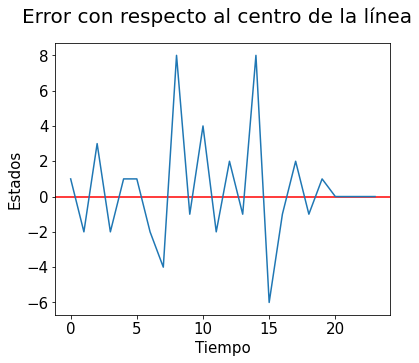

In [538]:
import numpy as np

values = np.array([1, -2, 3, -2, 1, 1, -2, -4, 8, -1, 4, -2, 2, -1, 8, -6, -1, 2, -1, 1, 0, 0, 0, 0])

fig, axs = plt.subplots(1, 1, figsize=(6, 5))
fig.suptitle(f"Error con respecto al centro de la línea", fontsize=20)

axs.set(xlabel='Tiempo', ylabel='Estados')
axs.axhline(y=0, c='r')

plt.plot(values)

plt.savefig("/home/nachoaz/Pictures/p_control.png")